<center>
    Sveučilište u Zagrebu<br>
    Fakultet elektrotehnike i računarstva<br>
    <a href="https://www.fer.unizg.hr/predmet/dubuce2">Duboko učenje 2</a>
</center>

<h1>
    Laboratorijska vježba 1: <br> Uvod u generativne modele
</h1>

In [2]:
# automatsko 're-importanje' modula kada se nešto izmijeni (kada dopunjavate kod u priloženim datotekama)
%load_ext autoreload
%autoreload 2

# podešavanje fonta i margina radi bolje čitljivosti (odabrati File -> Trust notebook)
from IPython.display import display, HTML

display(HTML('<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Source Serif Pro">'))

with open("style.css", "r") as file:
    display(HTML('<style>' + file.read() + '</style>'))

In [3]:
import math

import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams["figure.figsize"] = (6, 4.5)
sns.set_context("notebook")

from graphics import plot_context

## 1. Modeli mješavine

<b>Modeli mješavine</b> (engl. <i>mixture models</i>) su vjerojatnosni modeli koji distribuciju podataka $\boldsymbol x$ definiraju koristeći $K$-vrijednosnu kategorijsku slučajnu varijablu $\boldsymbol z$ tako da, ovisno o realizaciji varijable $\boldsymbol z$ kao $z_k$, podatak $\boldsymbol x$ dolazi iz jedne od mogućih $K$ različitih distribucija.
Funkcija gustoće vjerojatnosti koju opisuju je
\begin{equation}
    p_{\boldsymbol \theta}\left(\boldsymbol x\right) = \sum_{k=1}^K p_{\boldsymbol \theta}\left(\boldsymbol x, z_k\right) = \sum_{k=1}^K p_{\boldsymbol \theta}\left(\boldsymbol x \mskip{3mu}\middle\vert\mskip{3mu} z_k\right) \cdot p_{\boldsymbol \theta}\left(z_k\right),
\end{equation}
Pripadna funkcija razdiobe varijable $\boldsymbol z$ definirana je vektorom razdiobe $\boldsymbol \pi$:
\begin{equation}
    p_{\boldsymbol \theta}\left(z_k\right) = \pi_k,
\end{equation}
pri čemu vrijedi $\pi_k \ge 0$, za $k = 1, 2, \ldots, K$, i $\sum_{k=1}^K \pi_k = 1$.
Uvjetna gustoća vjerojatnosti $p_{\boldsymbol \theta}\left(\boldsymbol x \mskip{3mu}\middle\vert\mskip{3mu} z_k\right)$ predstavlja $k$-tu komponentu mješavine, a $\pi_k$ ujedno daje težinu $k$-te komponente mješavine.
Oznakom $\boldsymbol \theta$ označava se skup svih parametara modela.

Uvjetna gustoća vjerojatnosti $p_{\boldsymbol \theta}\left(\boldsymbol x \mskip{3mu}\middle\vert\mskip{3mu} z_k\right)$ zadaje se tako da za različite vrijednosti $z_k$ ima isti funkcijski oblik, ali različite vrijednosti parametara.
Izaberemo li kao $p\left(\boldsymbol x \mskip{3mu}\middle\vert\mskip{3mu} z_k\right)$ <a href="https://en.wikipedia.org/wiki/Normal_distribution">univarijatnu normalnu razdiobu</a>, dobivamo model koji gustoću vjerojatnosti opisuje kao
\begin{equation}
p_{\boldsymbol \theta}\left(x\right) = \sum_{k=1}^K \pi_k \cdot \mathcal N \left(x; \mu\left(z_k\right), \sigma^2\left(z_k\right)\right),
\end{equation}
gdje je s 
\begin{equation}
\mathcal N \left(x; \mu, \sigma^2\right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp\left(-\frac{1}{2} \cdot \frac{\left(x - \mu\right)^2}{\sigma^2}\right)
\end{equation}
označena gustoća vjerojatnosti normalne slučajne varijable s parametrima srednje vrijednosti $\mu$ i varijance $\sigma^2$.
Takav model zovemo još i <b>Gaussovom mješavinom</b>.
Kako je ovdje $\boldsymbol z$ kategorijska slučajna varijabla (koja može poprimiti konačno mnogo vrijednosti), dovoljno je definirati $\mu\left(\boldsymbol z\right)$ i $\sigma^2\left(\boldsymbol z\right)$ preko $K$ različitih parametara $\mu_k$ i $\sigma^2_k$, za $k = 1, 2, \ldots, K$:
\begin{align}
    \mu\left(z_k\right) &= \mu_k, \\
    \sigma^2\left(z_k\right) &= \sigma^2_k.
\end{align}
Skup svih parametara je u tom slučaju $\boldsymbol \theta = \left\{ \boldsymbol \pi, \boldsymbol \mu, \boldsymbol {\sigma^2} \right\}$, gdje su $\boldsymbol \pi = \left[\pi_1, \pi_2, \ldots, \pi_K \right]$, $\boldsymbol \mu = \left[\mu_1, \mu_2, \ldots, \mu_K \right]$, i $\boldsymbol {\sigma^2} = \left[\sigma^2_1, \sigma^2_2, \ldots, \sigma^2_K \right]$.

---
<b>a)</b>
Proučite priloženu klasu `GMDist` iz modula `utils` koja implementira distribuciju Gaussove mješavine.
Pomoću te klase generirajte jednu distribuciju s proizvoljnim vrijednostima parametara:
 - `pi`: vektor težina komponenata $\boldsymbol \pi$, dimenzija $K$,
 - `mu`: vektor srednjih vrijednosti $\boldsymbol \mu$, dimenzija $K$, i
 - `sigma2`: vektor varijanci $\boldsymbol \sigma^2$, dimenzija $K$;

ili koristite metodu `GMDist.random` za generiranje neke slučajne mješavine.
Preporučen broj komponenata mješavine je <b>između 3 i 5</b>.

Generirajte slučajni uzorak iz dobivene mješavine veličine $1000000$.
Nacrtajte na dva odvojena grafa:
 1. histogram generiranog uzorka (funkcija `plt.hist`, parametar bins postavite dovoljno velik i uključite `density=True` da njegova površina bude 1), i
 2. graf gustoće vjerojatnosti mješavine $p\left(\boldsymbol x\right)$ i njezinih komponenata $\pi_k \cdot p\left(\boldsymbol x; \mu_k, \sigma^2_k\right)$.

<p></p>

Uvjerite se da se dobiveni grafovi podudaraju (vidite [priloženu sliku](slika_1.png) za referencu).
Isprobajte par različitih vrijednosti parametara dok ne dobijete "zanimljivu" mješavinu koju ćete koristiti u podzadatcima <b>b)</b> i <b>c)</b>.

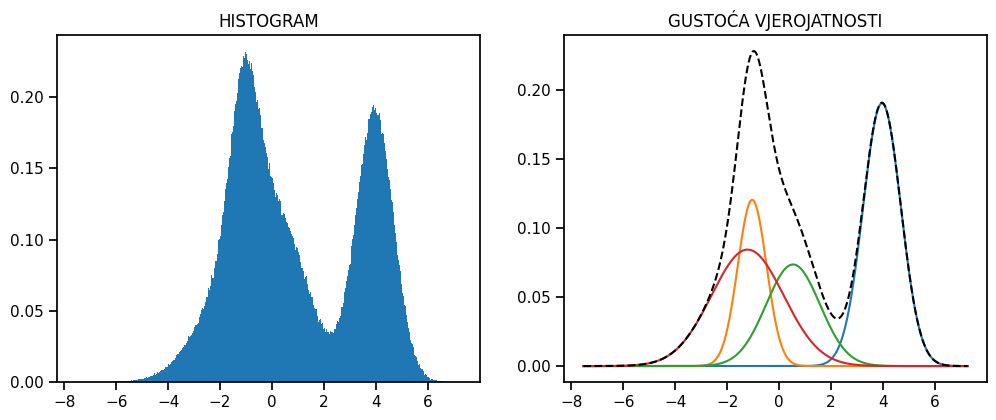

In [205]:
from dists import GMDist
from models import GMModel

K = 4
L = 1000000

dist = GMDist.random(K)
data = dist.sample(L)
data.sort()

lp = np.linspace(data[0], data[-1], 1000)

with plot_context(figsize=(12, 4.5), show=True):
    with plot_context(subplot=(1, 2, 1), title="HISTOGRAM"):
        plt.hist(data, bins=500, density=True)  # histogram

    with plot_context(subplot=(1, 2, 2), title="GUSTOĆA VJEROJATNOSTI"):
        for i in range(K):
           plt.plot(lp, dist.pi[i] * dist.p_xz(lp, i))  # komponente, pomnožene pripadajućim težinama
    
        plt.plot(lp, dist.p_x(lp),'k--')  # cijela mješavina


U vjerojatnosnom modeliranju pretpostavlja se da skup podataka $\mathcal D = \left\{ \boldsymbol x^{(1)}, \boldsymbol x^{(2)}, \ldots, \boldsymbol x^{(N)} \right\}$ sadrži realizacije neke slučajne varijable $\boldsymbol x$.
Prema kriteriju najveće izglednosti (engl. <i>maximum likelihood</i>), pri učenju modela biramo parametre $\boldsymbol \theta$ koji daju najveću izglednost uz zadani skup podataka.
Uvedemo li dodatnu pretpostavku da svi podatci dolaze kao realizacije iste slučajne varijable (odnosno kolekcije <a href="https://en.wikipedia.org/wiki/Iid">međusobno nezavisnih i jednako distribuiranih slučajnih varijabli</a>), funkcija izglednosti poprima oblik
\begin{equation}
    \mathcal L\left(\boldsymbol \theta \mskip{3mu}\middle\vert\mskip{3mu} \mathcal D\right) = p_{\boldsymbol \theta}\left(\boldsymbol x^{(1)}, \boldsymbol x^{(2)}, \ldots, \boldsymbol x^{(N)}\right) = \prod_{i=1}^N p_{\boldsymbol \theta}\left(\boldsymbol x^{(i)}\right).
\end{equation}

Funkcija izglednosti u svom izvornom obliku nezgrapna je za deriviranje, pa se stoga češće koristi njezin logaritam (oboje poprima maksimum za istu vrijednost parametara).
K tome je u strojnom učenju uobičajeno <b>minimizirati</b> nekakvu empirijsku mjeru pogreške koja je suma gubitaka po svim primjerima, pa je zgodno definirati empirijsku pogrešku kao <b>negativan logaritam izglednosti</b>, odnosno
\begin{equation}
    E\left(\boldsymbol \theta \mskip{3mu}\middle\vert\mskip{3mu} \mathcal D\right) = -\sum_{i=1}^N \log p_{\boldsymbol \theta}\left(\boldsymbol x^{(i)}\right),
\end{equation}
iz čega slijedi da je funkcija gubitka za jedan primjer $L_{\boldsymbol \theta}\left(\boldsymbol x^{(i)}\right) = -\log p_{\boldsymbol \theta}\left(\boldsymbol x^{(i)}\right) $.

---
<b>b)</b>
Dovršite implementaciju modela Gaussove mješavine `GMDist` iz modula `tf_utils` &mdash; dovršite sljedeće funkcije:
 - `loss(data)` &mdash; računa gubitak (ili vektor gubitaka) jednog primjera (ili vektora primjera),
 - `p_xz(x, k)` &mdash; računa gustoću vjerojatnosti primjera za $k$-tu komponentu, i
 - `p_x(x)` &mdash; računa gustoću vjerojatnosti primjera;
 
ili napišite vlastitu implementaciju koristeći biblioteku za duboko učenje po želji (<b>tensorflow</b>, <b>pytorch</b>).
Vašu implementaciju ćete trebati koristiti u narednim podzadatcima, stoga razmislite o tome da kōd izolirate u  klasu ili ga rasporedite kroz nekoliko funkcija.

Parametri modela analogni su parametrima distribucije $\boldsymbol \pi$, $\boldsymbol \mu$ i $\boldsymbol \sigma^2$, no ipak, prilikom pretraživanja prostora parametara gradijentnim spustom željeli bismo izbjeći ograničenja koja ti parametri moraju zadovoljavati, konkretno:
\begin{align}
    \pi_k &\ge 0, \quad \text{za} \, k = 1, 2, \ldots, K, \\
    \sum_{k=1}^K \pi_k &= 1, \\
    \sigma^2_k &> 0, \quad \text{za} \, k = 1, 2, \ldots, K.
\end{align}
Zato se umjesto vektora težina komponenata $\boldsymbol \pi$ uči vektor logaritama težina komponenata, $\operatorname{\mathbf{log}} \boldsymbol \pi$ (varijabla `logpi` u priloženom kodu), a umjesto vektora varijanci $\boldsymbol {\sigma^2}$ također vektor logaritama varijanci $\operatorname{\mathbf{log}} \boldsymbol \sigma^2$ (varijabla `logvar` u priloženom kodu).
Razlog je taj što logaritmi tih parametara smiju poprimiti bilo koju realnu vrijednost i pritom nisu međusobno vezani.
Težine komponenata dobivaju se natrag primjenom funkcije $\operatorname{\mathbf{softmax}}$: $\boldsymbol \pi = \operatorname{\mathbf{softmax}}\left(\operatorname{\mathbf{log}}\boldsymbol \pi\right)$, gdje je
\begin{equation}
    \operatorname{softmax}_k\left(\boldsymbol x\right) = \frac{\exp x_k}{\sum_{j=1}^K \exp x_j},
\end{equation}
a varijance primjenom funkcije $\operatorname{\mathbf{exp}}$, $\boldsymbol{\sigma^2} = \operatorname{\mathbf{exp}}\left(\operatorname{\mathbf{log}}\boldsymbol {\sigma^2}\right)$.

Naposljetku, radi sprječavanja gubitka preciznosti, kao i radi bržeg treniranja, preporučeno je od početka raditi s negativnim logaritmima gustoće vjerojatnosti (umjesto samim gustoćama vjerojatnosti).
U tom slučaju prirodno je definirati gubitke ostalih varijabli, $L_{\boldsymbol \theta}\left(x^{(i)} \mskip{3mu}\middle\vert\mskip{3mu} z_k\right)$ i $L_{\boldsymbol \theta}\left(z_k\right)$, kao
\begin{align}
    L_{\boldsymbol \theta}\left(x^{(i)} \mskip{3mu}\middle\vert\mskip{3mu} z_k\right) &= -\log \mathcal N \left(x; \mu_k, \sigma^2_k\right) = \frac{1}{2} \cdot \left(\log 2\pi + \log \sigma^2 + \frac{\left(x - \mu\right)^2}{\sigma^2}\right), \quad \text{i} \\
    L_{\boldsymbol \theta}\left(z_k\right) &= -\log \operatorname{softmax}_k \left(\operatorname{\mathbf{log}} \boldsymbol \pi\right) = \log \sum_{j=1}^K \exp \left(\operatorname{\mathbf{log}} \pi\right)_j - \left(\log \pi\right)_k
\end{align}
pa gubitak primjera $x^{(i)}$ u terminima $L_{\boldsymbol \theta}\left(x^{(i)} \mskip{3mu}\middle\vert\mskip{3mu} z_k\right)$ i $L_{\boldsymbol \theta}\left(z_k\right)$ iznosi
\begin{align}
    L_{\boldsymbol \theta}\left(x^{(i)}\right) &= - \log \sum_{k=1}^K \pi_k \cdot \mathcal N \left(x^{(i)}; \mu_k, \sigma^2_k\right) \\ 
    &= -\log \sum_{k=1}^K \exp \left(-\left( L_{\boldsymbol \theta}\left(x^{(i)} \mskip{3mu}\middle\vert\mskip{3mu} z_k\right) + L_{\boldsymbol \theta}\left(z_k\right) \right)\right).
\end{align}
Operacija $\operatorname{LSE}\left(\boldsymbol x\right) = \log \sum_{k=1}^K \exp x_k$ naziva se <a href="https://en.wikipedia.org/wiki/LogSumExp">logaritam sume eksponenata</a>. Biblioteke za duboko učenje nude implementaciju te operacije (`tf.reduce_logsumexp`, `torch.logsumexp`) kod koje dolazi do minimalnog gubitka preciznosti.
Pokušajte iskoristiti navedenu operaciju prilikom računanja pogreške; ako baš ne ide, izračunajte gustoću vjerojatnosti pa uzmite njezin negativan logaritam.

U nastavku je dan kōd koji možete iskoristiti za treniranje modela.

In [206]:
from models import GMModel

model = GMModel(K)
optimizer = tf.optimizers.Adam(1e-2)

L = 1000
data = dist.sample(L).reshape([-1, 1])
batch_size = 1000
num_epoch = 5000

for epoch in range(num_epoch):
    for i in range(math.ceil(L / batch_size)):
        chunk = data[i * batch_size:(i + 1) * batch_size]
        
        with tf.GradientTape() as tape:
            loss = tf.reduce_mean(model.loss(chunk), axis=0)

        grad = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(zip(grad, model.variables))
    
    display(HTML(f"EPOCH {epoch} / {num_epoch}"), clear=True)

<b>c)</b> Prikažite na istom grafu:
1. zadanu funkciju gustoće,
2. naučenu funkciju gustoće, i
3. histogram izvučenog uzorka.

Vidite <a href="slika_2.png">priloženu sliku</a> za referencu.

<p></p>
Slaže li se naučena gustoća sa zadanom?
Reprezentira li uzorak podataka zadanu distribuciju dovoljno dobro?

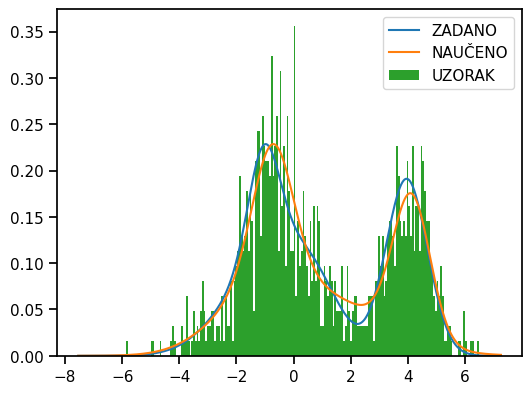

In [207]:

with plot_context(show=True, legend=["ZADANO", "NAUČENO", "UZORAK"]):
    plt.plot(lp, dist.p_x(lp))   # zadana gustoća
    plt.plot(lp, model.p_x(lp))  # naučena gustoća
    plt.hist(data, bins=200, density=True)  # histogram uzorka za učenje

<b>d)</b> Prikažite na dva odvojena grafa:
 1. zadanu gustoću vjerojatnosti mješavine i njenih pripadajućih komponenata, i
 2. naučenu gustoću vjerojatnosti mješavine i njenih pripadajućih komponenata.

Odgovaraju li komponente naučene mješavini komponentama iz zadane mješavine?

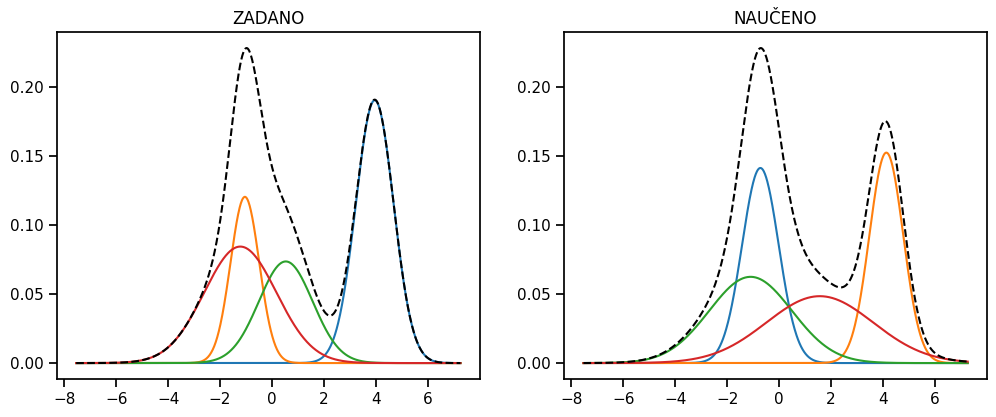

In [208]:
...

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):
        for k in range(K):
            plt.plot(lp, dist.pi[k] * dist.p_xz(lp, k))  # komponente, pomnožene pripadajućim težinama
            
        plt.plot(lp, dist.p_x(lp), 'k--')  # cijela mješavina
            
    with plot_context(subplot=(1, 2, 2), title="NAUČENO"):
        pi = tf.nn.softmax(model.logpi)
        for k in range(model.K):
            plt.plot(lp, pi[k] * model.p_xz(lp, k))  # komponente, pomnožene pripadajućim težinama
            
        plt.plot(lp, model.p_x(lp), 'k--')  # cijela mješavina

<b>e)</b>
Naučeni model mješavine može se koristiti i za <b>grupiranje podataka</b> (<i>clustering</i>) u $K$ grupa.
Uvjetna vjerojatnost $p_{\boldsymbol \theta}\left(z_k \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x\right)$ za $k = 1, 2, \ldots, K$, predstavlja vjerojatnost da primjer $\boldsymbol x$ dolazi iz $k$-te komponente mješavine i računa se kao
\begin{equation}
    p_{\boldsymbol \theta}\left(z_k \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x\right) = \frac{p_{\boldsymbol \theta}\left(\boldsymbol x, z_k\right)}{p_{\boldsymbol \theta}\left(\boldsymbol x\right)} = \frac{\pi_k \cdot p_{\boldsymbol \theta}\left(\boldsymbol x \mskip{3mu}\middle\vert\mskip{3mu} z_k\right)}{\sum_{i=1}^K \pi_i \cdot p_{\boldsymbol \theta}\left(\boldsymbol x \mskip{3mu}\middle\vert\mskip{3mu} z_i\right)}.
\end{equation}
Kriterij maksimalne izglednosti daje podjelu skupa podataka $\mathbb X$ na $K$ disjunktnih grupa na sljedeći način:
\begin{equation}
    \mathcal G_k = \left\{ \boldsymbol x \in \mathbb X \mskip{3mu}\middle\vert\mskip{3mu} \operatorname{arg\,max}_i p_{\boldsymbol \theta}\left(z_i \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x\right) = k \right\}
\end{equation}

Izvucite uzorak od 1000000 primjera iz prethodno zadane distribucije.
Nacrtajte na $K$ odvojenih grafova histograme pojedinih grupa.
Vidite <a href="slika_3.png">priloženu sliku</a> za referencu.

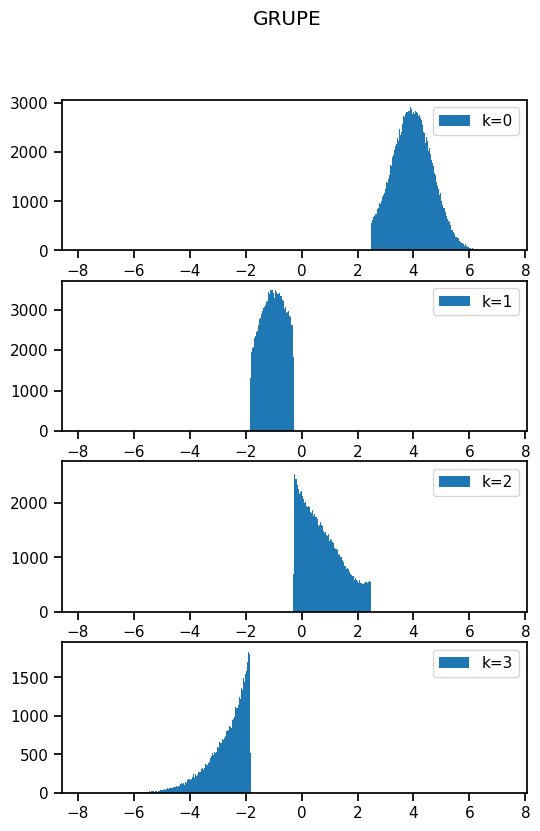

In [210]:
L = 1000000
data = dist.sample(L)
data.sort()

_, bins = np.histogram(data, bins=1001)  # ako želimo imati iste 'koševe' u svim grafovima: plt.hist(..., bins=bins)

groups = []
for k in range(K):
    groups.append([])

for x in data:
    group = np.argmax([dist.p_xz(x,k) / dist.p_x(x) for k in range(K)], axis=0)
    groups[group].append(x)

with plot_context(show=True, figsize=(6, 4.5 * model.K / 2), suptitle="GRUPE"):
    for k in range(K):
        with plot_context(subplot=(model.K, 1, k + 1), legend=[f"k={k}"]):
            plt.hist(groups[k], bins=bins)  # histogram grupe

<b>f)</b>
Implementirajte mješavinu (kontinuiranih) <a href="https://en.wikipedia.org/wiki/Continuous_uniform_distribution">uniformnih distribucija</a> po uzoru na priloženu implementaciju Gaussove mješavine.
Možete dopuniti zadanu klasu `UMDist` ili napisati vlastiti kod po želji.

Ponovno nacrtajte histogram i graf gustoće vjerojatnosti kao u podzadatku <b>a)</b>.
Koristite <b>2 do 3</b> komponente.
Generirajte neku "zanimljivu" mješavinu koju ćete koristiti u sljedećem podzadatku.

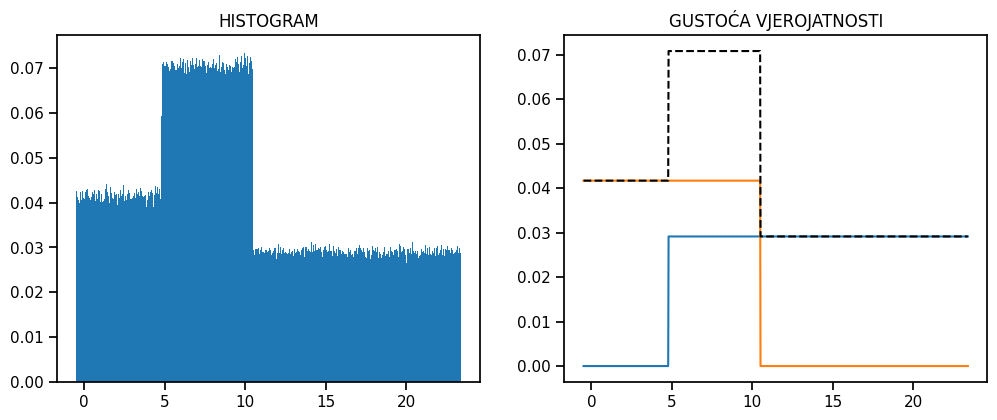

In [6]:
from dists import UMDist

K = 2
L = 1000000

dist = UMDist.random(K)
data = dist.sample(L)
data.sort()
lp = np.linspace(data[0], data[-1], 1000)

with plot_context(figsize=(12, 4.5), show=True):
    with plot_context(subplot=(1, 2, 1), title="HISTOGRAM"):
        plt.hist(data,bins=500,density=True)  # histogram

    with plot_context(subplot=(1, 2, 2), title="GUSTOĆA VJEROJATNOSTI"):
        for k in range(K):
            plt.plot(lp, dist.pi[k] * dist.p_xz(lp, k))   # komponente, pomnožene pripadajućim težinama
    
        plt.plot(lp, dist.p_x(lp), 'k--')  # cijela mješavina

<b>g)</b>
Zatim iskoristite model Gaussove mješavine da biste naučili prethodno generiranu mješavinu uniformnih distribucija.
Varirajte broj komponenata mješavine <b>modela</b> (ne distribucije) <b>između 3 i 10</b>, te veličinu uzorka za učenje i broj epoha.
U nastavku je dan kod za treniranje.

In [11]:
from models import GMModel

model = GMModel(7)
optimizer = tf.optimizers.Adam(1e-2)

L = 5000
data = dist.sample(L).reshape([-1, 1])
batch_size = 1000
num_epoch = 2000

for epoch in range(num_epoch):
    for i in range(math.ceil(L / batch_size)):
        chunk = data[i * batch_size:(i + 1) * batch_size]
        
        with tf.GradientTape() as tape:
            loss = tf.reduce_mean(model.loss(chunk), axis=0)

        grad = tape.gradient(loss, model.variables)
        optimizer.apply_gradients(zip(grad, model.variables))
    
    display(HTML(f"EPOCH {epoch} / {num_epoch}"), clear=True)

<b>i)</b> Ponovite vizualizacije iz <b>c)</b> i <b>d)</b> podzadataka.
Slaže li se naučena gustoća sa zadanom?
Reprezentira li uzorak podataka zadanu distribuciju dovoljno dobro?
Može li model Gaussove mješavine dobro aproksimirati i druge složene distribucije?

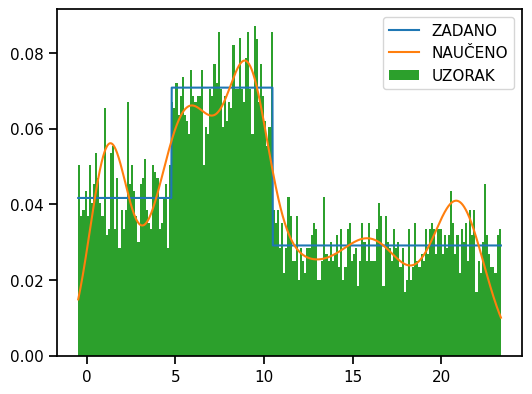

In [12]:
...
with plot_context(show=True, legend=["ZADANO", "NAUČENO", "UZORAK"]):
    plt.plot(lp, dist.p_x(lp))   # zadana gustoća
    plt.plot(lp, model.p_x(lp))  # naučena gustoća
    plt.hist(data, bins=200, density=True)  # histogram uzorka za učenje

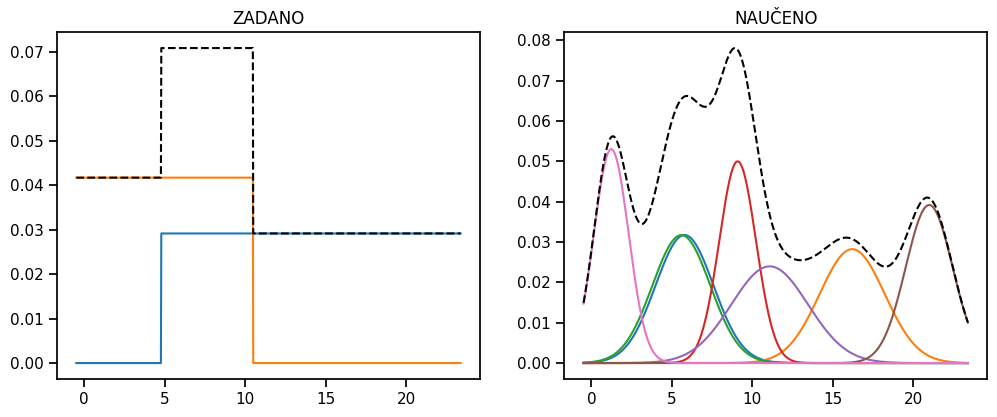

In [14]:
...

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):
        for k in range(K):
            plt.plot(lp, dist.pi[k] * dist.p_xz(lp, k))  # komponente, pomnožene pripadajućim težinama
            
        plt.plot(lp, dist.p_x(lp), 'k--')  # cijela mješavina
            
    with plot_context(subplot=(1, 2, 2), title="NAUČENO"):
        pi = tf.nn.softmax(model.logpi)
        for k in range(model.K):
            plt.plot(lp, pi[k] * model.p_xz(lp, k))  # komponente, pomnožene pripadajućim težinama
            
        plt.plot(lp, model.p_x(lp), 'k--')  # cijela mješavina

## 2. Probabilistička regresija

U klasičnoj regresiji, raspolažemo skupom podataka i njihovih pripadajućih oznaka $\mathcal D = \left\{ \left(\boldsymbol x^{(i)}, y^{(i)}\right) \right\}$.
Cilj je naučiti funkcijsku ovisnost između podatka $\boldsymbol x$ i njegove oznake $y$.
Tu funkciju opisujemo neuronskom mrežom $f_{\boldsymbol \theta}$,
\begin{equation}
    y^{(i)} = f_{\boldsymbol \theta}\left(\boldsymbol x^{(i)}\right) + \epsilon^{(i)}
\end{equation}
gdje $\boldsymbol \theta$ označava skup svih parametara te mreže, a $\epsilon^{(i)}$ slučajni šum.
Šum može biti <a href="https://en.wikipedia.org/wiki/Measurement_error">mjerni šum</a>, ali on također može dolaziti i od neosmotrenih (latentnih) varijabli koje utječu na oznaku $y^{(i)}$, ali njihove vrijednosti nam nisu poznate, pa je stoga model nepotpun.
Sam šum nije dio modela, već se najbolja točkasta procjena oznake $i$-tog podatka $\hat{y}^{(i)}$ dobiva kao
\begin{equation}
    \hat{y}^{(i)} = f_{\boldsymbol \theta}\left(\boldsymbol x^{(i)}\right).
\end{equation}
Definiramo proizvoljnu funkiju gubitka $L_{\boldsymbol \theta}\left(\hat{y}, y\right)$, najčešće kvadratni $\left(y - \hat{y}\right)^2$ ili apsolutni gubitak $\left\lvert y - \hat{y} \right\rvert$.
Sada se optimalna funkcija $f_{\boldsymbol \theta}$ može pronaći minimiziranjem empirijskog gubitka
\begin{equation}
    E\left(\boldsymbol \theta \mskip{3mu}\middle\vert\mskip{3mu} \mathcal D\right) = \sum_{i = 1}^N L_{\boldsymbol \theta}\left(\hat{y}^{(i)}, y^{(i)}\right).
\end{equation}

U probabilističkoj regresiji, oznaku $i$-tog podatka $y^{(i)}$ tretiramo kao realizaciju slučajne varijable $\left. y \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x^{(i)} \right.$.
Zadajemo odgovarajuću parametriziranu distribuciju $p_{\boldsymbol \theta}\left(y \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x\right)$ kojom ćemo opisati te realizacije.
U većini slučajeva to će biti normalna distribucija $\mathcal N\left(\mu\left(\boldsymbol x\right), \sigma^2\left(\boldsymbol x\right)\right)$, ali možemo zadati i neku drugu.
Nadalje, želimo odabrati parametre $\boldsymbol \theta$ za koje je izglednost da generiraju dostupne oznake najveća.
Uz iste pretpostavke kao u prethodnom zadatku, definiramo izglednost
\begin{equation}
    \mathcal L\left(\boldsymbol \theta \mskip{3mu}\middle\vert\mskip{3mu} \mathcal D\right) = \prod_{i = 1}^N p_{\boldsymbol \theta}\left(y^{(i)} \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x^{(i)}\right),
\end{equation}
odnosno empirijsku pogrešku
\begin{equation}
    E\left(\boldsymbol \theta \mskip{3mu}\middle\vert\mskip{3mu} \mathcal D\right) = -\sum_{i = 1}^N \log p_{\boldsymbol \theta}\left(y^{(i)} \mskip{3mu}\middle\vert\mskip{3mu} \boldsymbol x^{(i)}\right).
\end{equation}

U ostatku ovog zadatka modelirat ćemo podatke u skladu sa sljedećim distribucijama:
\begin{align}
    x &\sim \mathcal N\left(0, 1\right),  \\
    \left. y \, \middle \vert \, x \right. &\sim \mathcal N\left(\mu \left(x\right), \sigma^2\left(x\right) \right).
\end{align}
Funkcije $\mu\left(x\right)$ i $\sigma^2\left(x\right)$ opisat ćemo neuronskom mrežom.
Parametri $\boldsymbol \theta$ parametri su te mreže.
Izlaz modela više nije točkasta procjena $\hat{y}$, već slučajna varijabla koja nam može nešto reći i o nesigurnosti procjene, odnosno šumu kojeg klasična regresija zanemaruje.

---
<b>a)</b>
Proizvoljno definirajte funkcije `mean_y(x)` i `sigma2_y(x)` koje opisuju ovisnost parametara $\mu$ i $\sigma^2$ uvjetne slučajne varijable $\left.y \mskip{3mu}\middle\vert\mskip{3mu} x\right.$ u ovisnosti o realizaciji slučajne varijable $x$.
Napravite funkciju `gen_data(L)` koja generira $L$ uzoraka slučajne varijable $x$ i njima pripadnih oznaka $y$.

Zatim generirajte uzorak veličine $L = 1000$ i odvojeno prikažite:
 1. graf intervala pouzdanosti širine 1-$\sigma$ uvjetne slučajne varijable $\left. y \mskip{3mu}\middle\vert\mskip{3mu} x \right.$ (to je raspon vrijednosti između $\mu - \sigma$ i $\mu + \sigma$),
 2. graf raspršenja generiranog uzorka.

Vidite <a href="slika_4.png">priloženu sliku</a> za referencu.
Varirajte funkcije `mean_y` i `sigma2_y` tako da dobijete neku "zanimljivu" distribuciju.

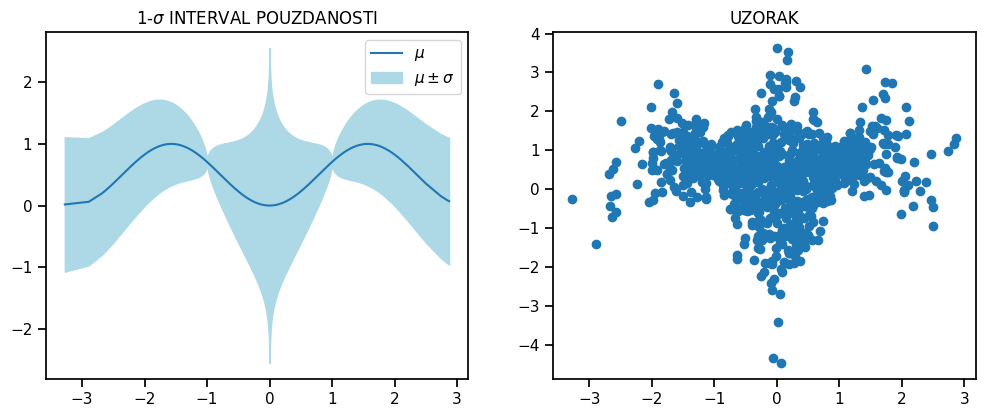

In [217]:
mean_y = lambda x: np.sin(x)**2
sigma2_y = lambda x: np.log(np.abs(x))
L = 1000

def gen_data(L):    
    X = np.random.normal(0,1, L)
    X.sort()
    Y = np.random.normal(mean_y(X), np.sqrt(np.abs(sigma2_y(X))) )
    
    return X, Y

X, Y = gen_data(L)
mean = mean_y(X)
sigma = np.sqrt(np.abs(sigma2_y(X)))

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="1-$\sigma$ INTERVAL POUZDANOSTI", legend=["$\mu$", "$\mu \pm \sigma$"]):

        plt.plot(X, mean)  # srednja vrijednost
        plt.fill_between(X, mean - sigma, mean + sigma,  color='lightblue')
        #interval povjerenja

    with plot_context(subplot=(1, 2, 2), title="UZORAK"):
        plt.scatter(X, Y)  # uzorak

<b>b)</b>
Koristite neuronsku mrežu za učenje parametara uvjetne slučajne varijable $\left. y \mskip{3mu}\middle\vert\mskip{3mu} x \right.$.
Varirajte broj slojeva mreže <b>između 2 i 5</b> (ne brojeći ulazni sloj), te isprobajte različite kombinacije broja čvorova u skrivenim slojevima.
Po želji možete isprobati i različite aktivacijske funkcije u skrivenim slojevima.
Izlazni sloj mora imati $2$ čvora, te na njega ne smije biti primijenjena aktivacija.
Dovršite kod za treniranje, pa istrenirajte model nad generiranim uzorkom.

In [245]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(2, activation=None)])

optimizer = tf.optimizers.Adam(1e-3)

for _ in range(1000):
    X, Y = gen_data(100)
    
    with tf.GradientTape() as tape:
        mean, logvar = tf.split(model(X.reshape([-1, 1])), num_or_size_splits=[1, 1], axis=1)
        
        var = tf.exp(logvar)
        loss = GMModel.neglog_normal_pdf(X, mean, logvar)     

    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

<b>c)</b> Na dva odvojena grafa prikažite interval pouzdanosti širine 1-$\sigma$ uvjetne slučajne varijable $\left. y \mskip{3mu}\middle\vert\mskip{3mu} x \right.$
 1. zadane distribucije, i
 2. naučenog modela.

Podudaraju li se grafovi?
Može li naučeni model generirati nove primjere slične onima iz skupa za učenje?

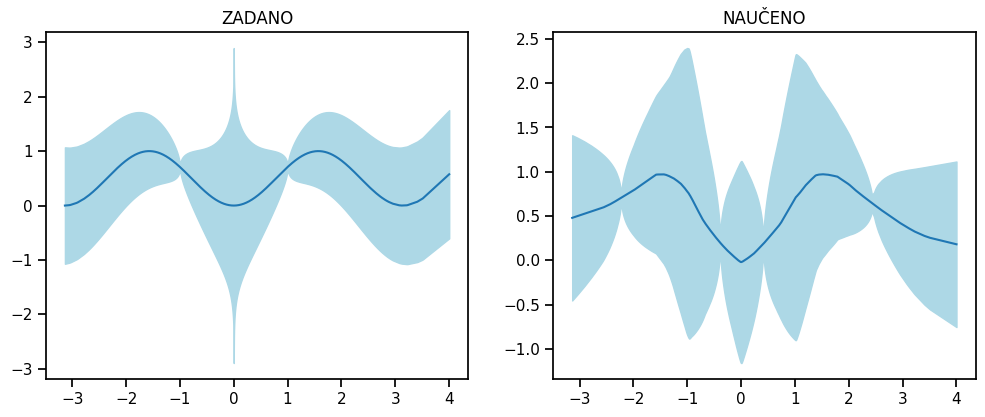

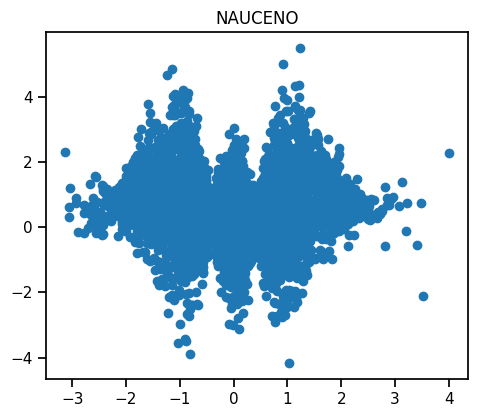

In [246]:
...
X, Y = gen_data(L)

model_out = model(X)
model_mean = model_out[:, 0]  # Prvi stupac
modeL_sigma2 = model_out[:, 1]  # Drugi stupac

model_sigma = np.sqrt(np.abs(modeL_sigma2))

mean = mean_y(X)
sigma = np.sqrt(np.abs(sigma2_y(X)))

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):

        plt.plot(X, mean)  # srednja vrijednost
        plt.fill_between(X, mean - sigma, mean + sigma, 
            color='lightblue', label=r'$\mu \pm \sigma$')
        #interval povjerenja

        
    with plot_context(subplot=(1, 2, 2), title="NAUČENO"):
        plt.plot(X, model_mean)  # srednja vrijednost
        plt.fill_between(X, model_mean - model_sigma, model_mean + model_sigma, 
            color='lightblue', label=r'$\mu \pm \sigma$')
        #interval povjerenja


model_Y = np.random.normal(model_mean, model_sigma)

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 2), title="NAUCENO"):
        plt.scatter(X, model_Y)  # uzorak



<b>d)</b>
Za usporedbu istrenirajte i klasičan model regresije uz kvadratni ili apsolutni gubitak, pa na dva odvojena grafa prikažite:
 1. interval pouzdanosti širine 1-$\sigma$ uvjetne slučajne varijable $\left. y \mskip{3mu}\middle\vert\mskip{3mu} x \right.$ zadane distribucije, i
 2. točkastu procjenu oznake $\hat{y}$ koju daje model i graf raspršenja uzorka veličine $L = 100$.

Pogađa li procjena modela približno točke u grafu raspršenja?

In [221]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1, activation=None)])

optimizer = tf.optimizers.Adam(1e-3)

for _ in range(1000):
    X, Y = gen_data(100)
    
    with tf.GradientTape() as tape:
        y_hat = model(X.reshape([-1, 1]))
        loss = 0.5 * (Y-y_hat)**2
        
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

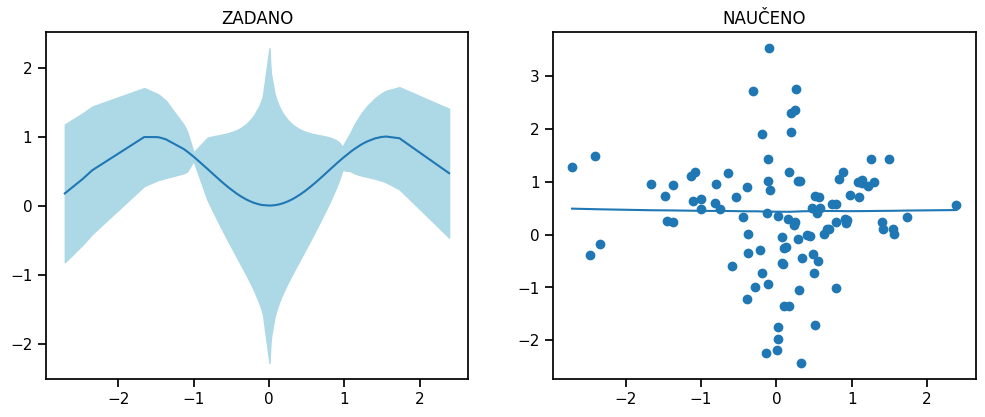

In [223]:
...

X, Y = gen_data(100)
X.sort()
mean = mean_y(X)
sigma = np.sqrt(np.abs(sigma2_y(X)))

with plot_context(show=True, figsize=(12, 4.5)):
    with plot_context(subplot=(1, 2, 1), title="ZADANO"):

        plt.plot(X, mean)  # srednja vrijednost
        plt.fill_between(X, mean - sigma, mean + sigma, 
            color='lightblue', label=r'$\mu \pm \sigma$')
        #interval povjerenja

        
    with plot_context(subplot=(1, 2, 2), title="NAUČENO"):
        y_hat =model(X)
        plt.plot(X, y_hat)  # srednja vrijednost
        plt.scatter(X, Y)  # uzorak


## 3. Generiranje uzorka slučajne varijable
Generiranje uzorka neke proizvoljno zadane slučajne varijable može biti složenije nego što se na prvi pogled čini.
Jedan način je da generiramo uzorak neke druge slučajne varijable $\varepsilon$ čija distribucija je neka od standardnih (npr. uniformna ili normalna), a zatim primjenom određene funkcije na taj uzorak postići da se transformirani uzorak ravna prema željenoj distribuciji.

Ovdje ćemo koristiti transformaciju pomoću <a href="https://en.wikipedia.org/wiki/Inverse_transform_sampling">inverza kumulativne distribucije</a>.
Ako je
\begin{equation}
  \mathit{P}\left(z\right) = \int_{-\infty}^z p\left(z\right) \, dz
\end{equation}
<a href="https://en.wikipedia.org/wiki/Cumulative_distribution_function">kumulativna funkcija distribucije</a> slučajne varijable $z$, a $\varepsilon$ slučajna varijabla koja ima distribuciju $\mathcal U\left(0, 1\right)$, tada će funkcija $P^{-1}\left(\varepsilon\right)$ biti distribuirana jednako kao i slučajna varijabla $z$, stoga možemo pisati
\begin{equation}
  z = P^{-1}\left(\varepsilon\right).
\end{equation}

U ovom zadatku ćemo koristiti kontinuiranu slučajnu varijablu $z$ s gustoćom vjerojatnosti
\begin{equation}
  p\left(z\right) = \begin{cases}
    \displaystyle \frac{3}{4} \left(1 - z^2\right), & z \in \left[-1, 1\right], \\[0.5em]
    0, & \text{inače}.
  \end{cases}
\end{equation}
Za nju vrijedi
\begin{equation}
  P\left(z\right) = \begin{cases}
    0, & z \in \left<-\infty, -1\right], \\[0.5em]
    \displaystyle -\frac{1}{4} z^3 + \frac{3}{4} z + \frac{1}{2}, & z \in \left[-1, 1\right], \\[0.5em]
    1, & z \in \left[1, \infty\right>.
  \end{cases}
\end{equation}
Budući da je $P\left(z\right)$ bijektivna na intervalu $\left[-1, 1\right]$, znamo da njezin inverz postoji, ali za njegovo određivanje potrebno je <a href="https://en.wikipedia.org/wiki/Cubic_equation#Trigonometric_solution_for_three_real_roots">riješiti kubnu jednadžbu</a>.
Navest ćemo bez izvođenja da je inverz te funkcije (samo na intervalu $\left[-1, 1\right]$) jednak
\begin{equation}
  z = P^{-1}\left(\varepsilon\right) = 2 \cos\left(\frac{\cos^{-1}\left(1 - 2\varepsilon\right) + \pi}{3}\right), \quad 0 \le \varepsilon \le 1.
\end{equation}
Sada možemo primijeniti metodu transformacije pomoću inverza kumulativne funkcije distribucije kako bismo generirali uzorak $z \sim p\left(z\right)$.

---

<b>Zadatak:</b> Generirajte uzorak varijable $\varepsilon$ veličine $L = 1000000$ (milijun), a zatim ga transformirajte pomoću inverza kumulativne funkcije distribucije kako je opisano gore.
Na istom grafu prikažite:
  1. histogram dobivenog uzorka $z \sim p\left(z\right)$ <br>
  (uz velik broj `bins`-a i parametar `density=True`), i
  2. funkciju gustoće vjerojatnosti $p\left(z\right)$.
  
Provjerite prati li histogram generiranog uzorka funkciju gustoće vjerojatnosti. Histogram generiranog uzorka mora pratiti funkciju gustoće.

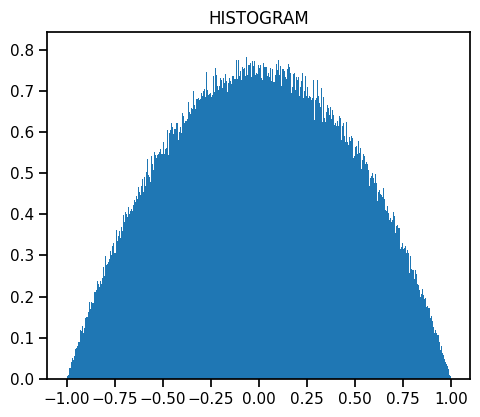

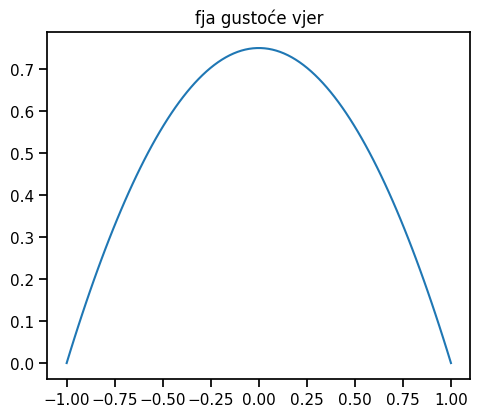

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from graphics import plot_context

L = 1_000_000

e = np.random.uniform(0, 1, L)
z = 2* np.cos( (np.arccos(1-2*e) + np.pi) /3)

with plot_context(figsize=(12, 4.5), show=True):
    with plot_context(subplot=(1, 2, 1), title="HISTOGRAM"):
        plt.hist(z, bins=1000, density=True) # histogram

z = np.linspace(-1,1, 100)
p_z =  (3/4) * (1-z*z)

with plot_context(figsize=(12, 4.5), show=True):
    with plot_context(subplot=(1, 2, 1), title="fja gustoće vjer"):
       plt.plot(z, p_z)